In [20]:
import numpy as np
import torch
import matplotlib
import pandas as pd
import sklearn
from sklearn.ensemble import RandomForestRegressor
import yfinance as yf

In [21]:
aapl = yf.Ticker("AAPL")
aapl_history = aapl.history(period="max")
aapl_history

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.098726,0.099155,0.098726,0.098726,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094005,0.094005,0.093575,0.093575,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087136,0.087136,0.086707,0.086707,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.088853,0.089282,0.088853,0.088853,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091429,0.091858,0.091429,0.091429,73449600,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-24 00:00:00-05:00,244.929993,248.860001,244.419998,247.100006,51326400,0.0,0.0
2025-02-25 00:00:00-05:00,248.000000,250.000000,244.910004,247.039993,48013300,0.0,0.0
2025-02-26 00:00:00-05:00,244.330002,244.979996,239.130005,240.360001,44433600,0.0,0.0


<Axes: xlabel='Date'>

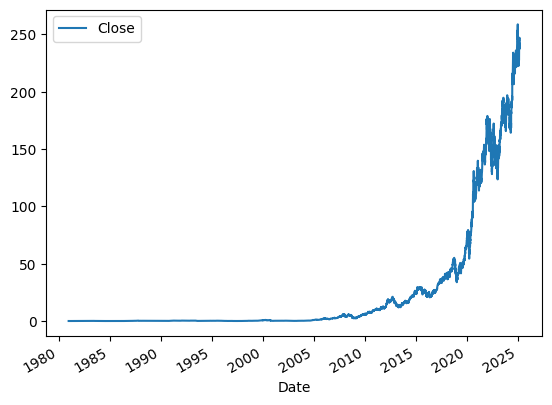

In [22]:
aapl_history.plot.line(y="Close", use_index="True")

In [26]:
model = RandomForestRegressor()

In [27]:
#Training Phase
X = aapl_history[["Open", "High", "Low", "Volume"]]
X = X[:int(len(aapl_history)-1)]
y = aapl_history["Close"]
y = y[:int(len(aapl_history)-1)]
model.fit(X,y) #Line that actually trains model

RandomForestRegressor()

In [29]:
#Testing Phase
predictions = model.predict(X)
print("The model Score is:", model.score(X,y))

The model Score is: 0.9999883965323186


In [31]:
#Make the prediction
new_data = aapl_history[["Open", "High", "Low", "Volume"]].tail(1)
prediction = model.predict(new_data)
print("The model predicts the last row or day to be:", prediction)
print("Actual value is:", aapl_history[["Close"]].tail(1).values[0][0])

The model predicts the last row or day to be: [236.64758484]
Actual value is: 241.83999633789062
